# Supervised Learning and Regression

Going to use my own methods to fit a linear model to possum physiology data using either OLS or LAD cost functions.


In [1]:
#start by importing all the necessary packages
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

Focus on the relationship between the tail length and age of a given possum in the imported data set.

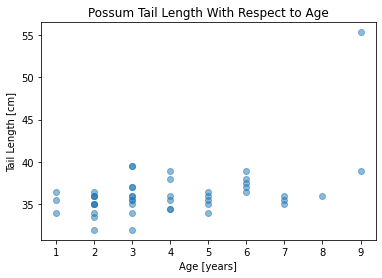

In [2]:
possum_data = pd.read_csv('possum.csv')
ages=possum_data.loc[:,'age'].values
tailLengths=possum_data.loc[:,"tailL"].values
ages=np.reshape(ages,(-1,1))

#visualize
plt.scatter(ages, tailLengths, alpha=0.5)
plt.title("Possum Tail Length With Respect to Age")
plt.xlabel("Age [years]")
plt.ylabel("Tail Length [cm]")
plt.show()


In [3]:
#define a function which computes a predicted response value for a given input design matrix (2-d array) and coefficients (1-d array)
def linearModelPredict(b,X):
    yp = X@b
    return yp

In [4]:
#define a function for computing OLS loss and gradient of the loss for a given input design matrix, parameter array, and response variable
#this function will call the model prediction function
def linearModelLossRSS(b,X,y): #b-parameter, X-input, y-real data
    #Get model predicitons
    predictedY=linearModelPredict(b,X)
    #Get the vector of residuals
    residuals=np.subtract(y,predictedY) 
    #Get the residual sums of squares
    residual_sum_of_squares=np.sum(np.square(residuals))
    #Get the gradient
    gradient=-2*(X.T@residuals) 
    #Return the residual sum of squares and the gradient
    return (residual_sum_of_squares, gradient)


In [5]:
#define a function which will return optimal model parameters based on input data by minimizing a given loss
#the function returns the optimal parameters and R2 value
def linearModelFit(X,y,lossfcn):
    #set the starting values of the parameters ("beta")
    bstart=np.zeros((2,1))
    #Call the optimization function
    result=so.minimize(lossfcn,bstart, args=(X,y), jac=True)
    estimated_betas=result.x
    #Calculate R2 -coefficient of determination
    (RSS, gradient)=lossfcn(estimated_betas,X,y)
    TSS=np.sum(np.square(np.subtract(y,np.mean(y))))
    R2=1-(RSS/TSS)
    return (estimated_betas,R2)

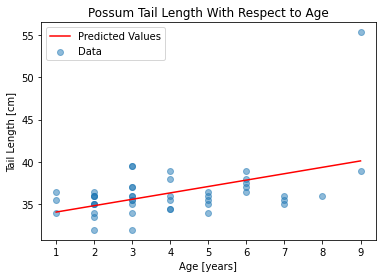

The R2 value for this fit is:  0.22286587947604108  .


In [6]:
#now fit the possum data set using the above functions in order to predict possum tail length by age
# Make the design matrix using np._c
y=tailLengths
x=ages
X=np.c_[np.ones(x.size), x]

# Call your fitting function
(b_RSS, R2_RSS)=linearModelFit(X,y,linearModelLossRSS)

# Create the scatter plot (see quesiton 1.1)
plt.scatter(ages, tailLengths, alpha=0.5,label="Data")
plt.title("Possum Tail Length With Respect to Age")
plt.xlabel("Age [years]")
plt.ylabel("Tail Length [cm]")

# Create a new X matrix with equally space data
x_grid=np.linspace(x.min(), x.max(), x.size)
Xn=np.c_[np.ones(x.size),x_grid]

# Add the line to the graph
yp_RSS=linearModelPredict(b_RSS,Xn)
plt.plot(x_grid, yp_RSS, color='red', label="Predicted Values")
plt.legend()
plt.show()

# Report R2
print("The R2 value for this fit is: ", R2_RSS, " .")

In [7]:
#now let us explore LAD loss

#define a function for computing LAD loss and gradient of the loss for a given input design matrix, parameter array, and response variable
#this function will call the model prediction function
def linearModelLossLAD(b,X,y):
    #Get Model Prediction
    predY=linearModelPredict(b,X)
    #Get the vector of the absolute values of devations from observed data
    deviations=np.abs(np.subtract(y,predY))
    #Get the gradient
    grad=-1*(X.T@deviations)
    #Now compute the sum of the absolute values of deviations from observed data
    sum_abs_dev=np.abs(np.sum(deviations))
    return (sum_abs_dev,grad)

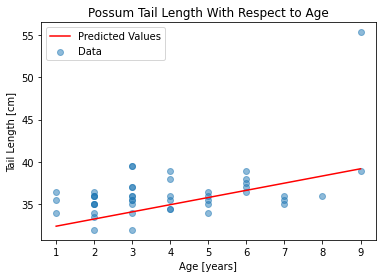

The R2 value for this fit is:  0.8066521807411193  .


In [8]:
#again, fit the possum data, but this time use the LAD loss function
# Make the design matrix using np._c
y=tailLengths
x=ages
X=np.c_[np.ones(x.size), x]

# Call your fitting function
(b_LAD, R2_LAD)=linearModelFit(X,y,linearModelLossLAD)

# Create the scatter plot (see quesiton 1.1)
plt.scatter(ages, tailLengths, alpha=0.5, label="Data")
plt.title("Possum Tail Length With Respect to Age")
plt.xlabel("Age [years]")
plt.ylabel("Tail Length [cm]")

# Create a new X matrix with equally space data
x_grid=np.linspace(x.min(), x.max(), x.size)
Xn=np.c_[np.ones(x.size),x_grid]

# Add the line to the graph
yp_LAD=linearModelPredict(b_LAD,Xn)
plt.plot(x_grid, yp_LAD, color='red', label="Predicted Values")
plt.legend()
plt.show()

# Report R2
print("The R2 value for this fit is: ", R2_LAD, " .")

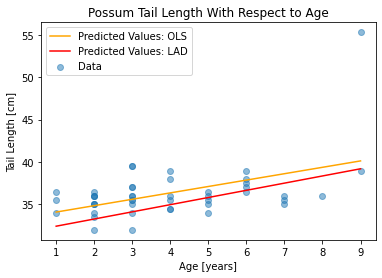

In [9]:
# Create a plot illustrating both fits from L1 (LAD) and L2 (OLS) loss functions
plt.scatter(ages, tailLengths, alpha=0.5, label="Data")
plt.title("Possum Tail Length With Respect to Age")
plt.xlabel("Age [years]")
plt.ylabel("Tail Length [cm]")
plt.plot(x_grid,yp_RSS,label="Predicted Values: OLS", color="orange")
plt.plot(x_grid, yp_LAD, label="Predicted Values: LAD", color='red')
plt.legend()
plt.show()



Model intercept:  34.969465648854964 .
Model slope:  [0.32442748] .


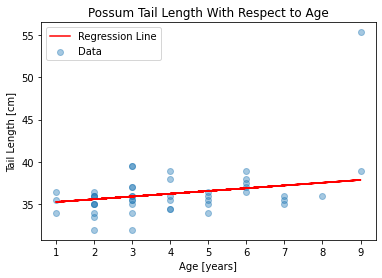

The R2 value for this fit is:  0.1504522627623347  .


In [10]:
#now use sklearn's LinearRegression class

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
y=tailLengths
x=ages

# Split up the data into training and testing sets
# Let's use 70% for testing and 30% for training
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.7, random_state=0)

# Create the linear regression object
regression=linear_model.LinearRegression()

# Train the model
regression.fit(x_train,y_train)

# Report the model intercept and slope
print("Model intercept: ",regression.intercept_, ".")
print("Model slope: ",regression.coef_, ".")

# Compute the predicted values based on the model using the testing data
y_pred = regression.predict(x_test)

# Create the scatter plot with the line illustrating the predicted values
plt.scatter(x,y,alpha=0.4, label="Data")
plt.plot(x_test, y_pred, color='red', label="Regression Line")
plt.title("Possum Tail Length With Respect to Age")
plt.xlabel("Age [years]")
plt.ylabel("Tail Length [cm]")
plt.legend()
plt.show()

# Report the R2 value for this fit
R2_regression=r2_score(y_test, y_pred)
print("The R2 value for this fit is: ", R2_regression, " .")

In [11]:
## we can see by the R2 values of each of the fits explored that my models were able to fit the data more effectively than that from sklearn's LinearRegression